In [15]:
import sys
import librosa  # python package for music and audio analysis
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import efficientnet.tfkeras as efn #Convolutional Neural Network architecture
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input
#from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.utils import class_weight

/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


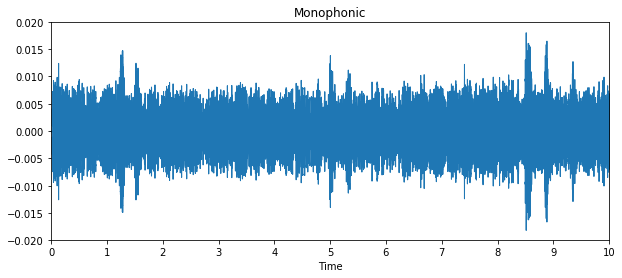

In [16]:
SOUND_DIR='/Users/mm43543/Downloads/Ptarmigan Dr 2.mp3'
# listen to the recording
ipd.display(ipd.Audio(SOUND_DIR))

# load the mp3 file
signal, sr = librosa.load(SOUND_DIR,duration=10) # sr = sampling rate

# plot recording signal
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title('Monophonic')
plt.show()

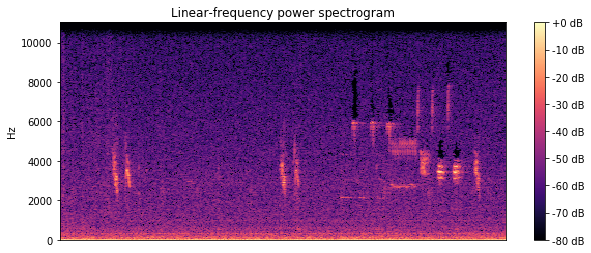

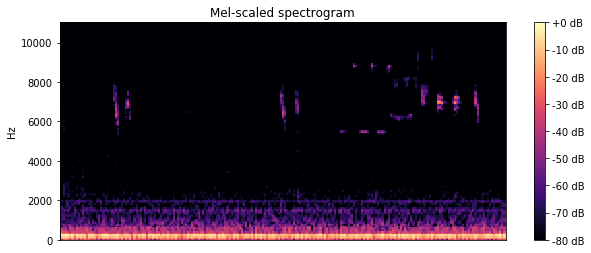

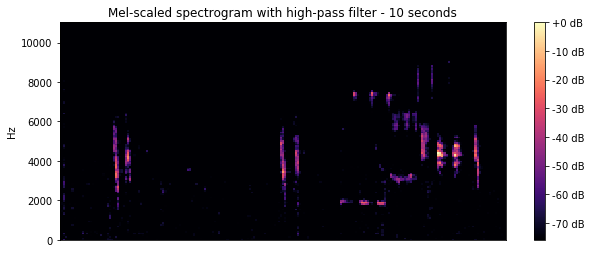

In [17]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 0 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()

In [18]:
print(S)

[[1.5093822e-06 4.5187971e-06 3.9363575e-05 ... 1.4982427e-06
  4.6901764e-06 6.3367584e-06]
 [1.7043029e-06 8.0058444e-06 9.3680565e-06 ... 3.3394367e-06
  6.3629104e-06 7.3946303e-06]
 [2.9079126e-06 3.9313913e-06 4.3519372e-06 ... 3.7449161e-06
  8.6630262e-06 4.2984811e-06]
 ...
 [2.1626683e-09 3.1406763e-08 2.0407914e-07 ... 1.7534276e-08
  1.1930420e-08 3.3559200e-08]
 [5.7281430e-10 5.5085616e-09 3.4507710e-09 ... 2.3139173e-09
  2.4016031e-09 2.5356621e-09]
 [1.3124914e-10 4.1902623e-10 8.6813257e-10 ... 8.5505318e-11
  8.8786277e-11 2.9471636e-10]]


# PRE-PROCESSING

In [81]:
import os
import skimage
import numpy

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(mels, out):
    # use log-melspectrogram
    #mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                            #n_fft=hop_length*2, hop_length=hop_length)
    mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
    img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)

.DS_Store
HouseSparrow
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/549156.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/388579.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/512608.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/475687.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557383.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/497819.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/483475.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/565682.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/447437.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/539116.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/466360.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/146253.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557778.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151115.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555184.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151101.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526397.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/561786.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/524219.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/465536.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/498493.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/561787.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526396.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509836.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/441866.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/65560.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/475447.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/457180.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/436230.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/565683.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474956.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530696.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554476.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459146.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/576358.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555595.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/531007.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/443452.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/432295.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548539.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/76898.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/513501.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/448288.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/513298.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/522079.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459144.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/528971.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/490378.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557009.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541858.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/465285.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541441.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500409.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/465520.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/107146.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/422118.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553939.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556841.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/160862.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559757.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/558449.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/475444.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/496085.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/416685.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/466362.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/575646.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/463030.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/481089.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/513500.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/542029.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/302124.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/432294.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/209059.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/495991.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546263.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459343.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/503475.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449554.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/552835.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/478992.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/538408.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/443247.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449018.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554075.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/210486.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/425699.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/479870.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541445.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/467864.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/550004.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449555.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/508535.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/445435.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/503474.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/568376.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/245732.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541041.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/483472.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/451905.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/208395.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/445794.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/145563.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541527.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557351.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544305.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/351547.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/445796.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/142742.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546880.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/550006.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/467866.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/443085.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557782.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151138.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/168578.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/538635.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537248.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526344.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/453903.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/561782.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/564822.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/470472.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/145158.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557783.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553526.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/575318.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/565123.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/376476.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/239375.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/78332.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/513738.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/551245.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/145560.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/101336.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546275.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/561184.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/75467.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/521289.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546206.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553623.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/532236.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/570011.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/519514.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/479586.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/344306.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/570549.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/511028.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/444029.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557928.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/381853.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/240216.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571253.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/453795.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555482.mp3
failed
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553795.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/471520.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/543237.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/505276.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/485338.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/533263.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/173498.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/237289.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/511029.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468461.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/464267.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/511607.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/93487.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/519515.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/384490.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/388296.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/5954.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/485516.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499671.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/521288.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/563091.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/441542.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/464715.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553807.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/428537.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/520619.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/519517.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/568488.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/462199.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/469033.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/522224.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468305.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559872.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/213467.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559721.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553556.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/376566.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544200.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/240215.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/383538.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/482482.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509499.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571244.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571250.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571251.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556836.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/44727.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571245.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557255.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/71039.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151160.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/491819.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/105519.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559091.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559708.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559720.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/469998.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/482939.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/519516.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/388295.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/448573.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499666.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499100.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499672.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/545735.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/572199.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449127.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/543378.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/522786.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/181543.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/467231.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/139186.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/501188.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526245.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/462188.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/565195.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/551218.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/344328.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544167.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509701.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/532032.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557047.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553553.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/132428.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500862.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151164.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/480904.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/436308.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/495851.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/192305.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/570604.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571254.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554003.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541432.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/533271.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553552.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553546.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559692.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/112666.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468467.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/535947.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544166.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509700.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/495501.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/501189.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556947.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/463056.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/181542.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509502.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/414547.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/564088.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/545734.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/572198.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459451.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/536082.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526246.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/551233.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/565196.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/281739.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509702.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527399.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/34628.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/514021.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559874.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468459.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/325716.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/349814.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553550.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553544.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/437798.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/480907.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500875.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/494782.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/529940.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/492126.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537217.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/192306.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/100117.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/440908.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530545.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537216.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/571243.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556824.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541431.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/170194.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/480906.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/533266.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553545.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/484382.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/349815.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468464.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/573911.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/281738.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/344302.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553800.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/516421.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499106.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/503010.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/495066.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541545.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527801.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/564092.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500500.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499651.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/501187.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/467941.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/392775.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548752.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468469.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557048.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/430945.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/436307.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151157.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151143.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/552454.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/139770.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/76013.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499094.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556829.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554794.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537233.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/445840.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/464865.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/535380.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553005.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/383533.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553561.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/533281.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/430944.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/444747.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/236834.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548753.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/467940.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/538288.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/564291.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/380358.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556790.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/414548.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/543376.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500501.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500503.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/549665.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/416611.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/441749.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/344330.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/79055.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/469947.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/34627.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/551214.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/489680.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/569833.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/396464.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/464442.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/480908.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537768.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/523279.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556816.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/570608.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541416.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/492128.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/384539.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151155.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/436305.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468457.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555715.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/34626.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/568480.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544142.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/344319.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/565365.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/131299.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/479957.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499109.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/500502.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/512106.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527803.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/560584.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/44689.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/509244.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554802.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/439378.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/303718.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/519527.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459671.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/511609.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544146.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468309.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/100530.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/430943.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/444230.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/405293.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/495694.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527032.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/385838.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/405292.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/550536.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151150.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/173497.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/553201.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/575359.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/468308.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/325709.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/444806.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/511608.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/486560.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459880.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/392772.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548755.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/48065.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/197467.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548543.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/352024.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/122553.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527804.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/560583.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/364541.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/344336.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544145.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/484361.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530808.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/112679.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/454381.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/237290.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557924.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/436302.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/129572.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/379470.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/462545.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/383292.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/499090.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/489254.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/485308.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/129573.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/431685.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/436303.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/533284.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/570550.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548756.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/384488.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/463060.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/253313.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554654.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449611.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/430463.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/538771.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/503268.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/483468.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/483483.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/535725.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/215043.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530701.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/443506.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/116041.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474355.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548490.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537244.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548484.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548491.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474354.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/180750.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/443507.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/531185.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/561567.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/569675.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/462907.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/497540.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/179901.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/464580.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/433157.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/177284.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/529133.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544308.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548526.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/166376.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/512602.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/479935.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/572653.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527134.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544652.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/90864.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559171.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/184642.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/517593.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/535726.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/483480.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555824.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/459944.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151123.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/566791.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/390512.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/384567.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/168211.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/373844.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/405237.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559548.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/550544.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530703.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/146258.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/417551.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/281740.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/556914.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/377559.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/535531.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555548.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/324840.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548521.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/501121.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/542024.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/542030.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/541539.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/364247.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/481090.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/511497.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/522713.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/539455.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/534603.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/547835.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/463029.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/454685.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/124181.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/554478.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/508461.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530698.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/544643.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/558281.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/405192.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/536570.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474804.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537083.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/550742.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151126.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/151132.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530707.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/168200.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/547014.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526398.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/494270.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474353.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474352.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/526399.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/189202.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530706.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/438428.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/537055.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557010.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/539118.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/358971.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/400941.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/402159.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555767.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/576357.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/377560.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/481091.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449170.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/502429.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546519.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546269.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/548522.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/460286.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/460279.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527132.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/542231.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/472457.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/536567.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/474807.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/557012.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/210466.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/74892.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/71040.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/236476.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546484.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/432106.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/530705.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/374320.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/463361.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/64882.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/555604.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/507977.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/559610.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/483478.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/475649.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/527133.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/449167.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/148918.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/HouseSparrow/546268.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


BeardedBellbird
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/427843.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/456301.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/427842.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/354955.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/427845.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/122738.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/512356.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/511850.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/22162.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/31877.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/22163.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/247119.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/427844.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/6586.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/22161.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/22160.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/521262.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/563535.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/64811.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/197484.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/493159.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/27870.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/307748.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/24177.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228597.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/189848.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/24176.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/163654.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/163655.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/130392.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/318303.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/214713.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/24178.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228598.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228604.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/287540.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228599.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/410711.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/214714.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228600.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/460345.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228601.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/214715.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/4689.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228603.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/228602.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/393269.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/14965.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/247117.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/1422.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/9056.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/247116.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/542023.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/14999.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/77769.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/8820.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/438835.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/9055.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/9054.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/9524.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/8821.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/247115.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/334312.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/513096.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/163382.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/163381.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/410614.mp3
/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio/BeardedBellbird/8238.mp3


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


failure count = 1


In [ ]:
path = '/Users/mm43543/Documents/Projects/ML/DSA/dataset/audio'
fail_counter = 0
for dirname in os.listdir(path):
    print(dirname)
    if not 'DS_Store' in dirname:
        for filename in os.listdir(path+'/'+dirname):
            if 'mp3' in filename:
                print(path+'/'+dirname+'/'+filename)
                SOUND_DIR = path+'/'+dirname+'/'+filename
                try:
                    signal, sr = librosa.load(SOUND_DIR,duration=10) # sr = sampling rate
                    S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                                n_fft=N_FFT,
                                                hop_length=HOP_SIZE, 
                                                n_mels=N_MELS, 
                                                htk=True, 
                                                fmin=FMIN, 
                                                fmax=sr/2) 
                    spectrogram_image(S,SOUND_DIR.replace('mp3','png'))
                except:
                    print('failed')
                    fail_counter+=1
print('failure count = ' + str(fail_counter))

 # TRAINING

In [62]:
IM_SIZE = (224,224) 
BIRDS = ['BeardedBellbird', 'HouseSparrow']
DATA_PATH = '/Users/mm43543/Documents/Projects/ML/data_days/'
BATCH_SIZE = 16

In [63]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,  
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.1,
                                   fill_mode='nearest')  
train_batches = train_datagen.flow_from_directory(DATA_PATH+'train',
                                                  classes=BIRDS,
                                                  target_size=IM_SIZE,
                                                  class_mode='categorical', shuffle=True,
                                                  batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_batches = valid_datagen.flow_from_directory(DATA_PATH+'val',
                                                  classes=BIRDS,
                                                  target_size=IM_SIZE,
                                                  class_mode='categorical', shuffle=False,
                                                  batch_size=BATCH_SIZE)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(DATA_PATH+'test',
                                                  classes=BIRDS,
                                                  target_size=IM_SIZE,
                                                  class_mode='categorical', shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 550 images belonging to 2 classes.
Found 58 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [64]:
#Define CNN's architecture
IM_SIZE = (224,224,3) 
net = efn.EfficientNetB3(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=IM_SIZE)  
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(BIRDS), activation='softmax', name='softmax')(x)
net_final = Model(inputs=net.input, outputs=output_layer)     
net_final.compile(optimizer=Adam(),
                  loss='categorical_crossentropy', metrics=['accuracy'])

print(net_final.summary())

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        input_7[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 40) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [72]:
# Estimate class weights for unbalanced dataset
print(train_batches.classes)
print(np.unique(train_batches.classes))
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_batches.classes), 
                train_batches.classes)

# Define callbacks
ModelCheck = ModelCheckpoint('models/efficientnet_checkpoint.h5', monitor='val_loss', verbose=0, 
                             save_best_only=True, save_weights_only=True, mode='auto', period=1)

ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=3e-4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [73]:
# Train the model
#net_final.fit_generator(train_batches,
                        #validation_data = valid_batches,
                        #epochs = 30,
                        #steps_per_epoch= 1596,
                        #class_weight=class_weights, callbacks=[ModelCheck,ReduceLR])
# Train the model
print(class_weights)
net_final.fit(train_batches,
                        validation_data = valid_batches,
                        epochs = 30,
                        steps_per_epoch= 1596,
                        #class_weight=class_weights, 
                        callbacks=[ModelCheck,ReduceLR])

[5.28846154 0.55220884]
Epoch 1/30
  35/1596 [..............................] - 200s 6s/step - loss: 0.7247 - accuracy: 0.9055 - val_loss: 0.9674 - val_accuracy: 0.9138 - lr: 0.0010


In [74]:
ypred = net_final.predict(test_batches)

In [78]:
ypred[0]

array([9.9999726e-01, 2.7246454e-06], dtype=float32)

# INFERENCE


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


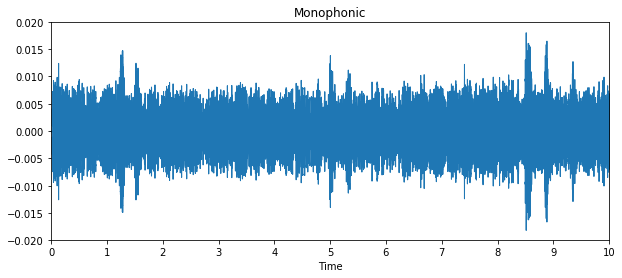

In [79]:
SOUND_DIR='/Users/mm43543/Downloads/Ptarmigan Dr 2.mp3'
# listen to the recording
ipd.display(ipd.Audio(SOUND_DIR))

# load the mp3 file
signal, sr = librosa.load(SOUND_DIR,duration=10) # sr = sampling rate

# plot recording signal
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title('Monophonic')
plt.show()

In [83]:
signal, sr = librosa.load(SOUND_DIR,duration=10) # sr = sampling rate
S = librosa.feature.melspectrogram(y=signal,sr=sr,
                            n_fft=N_FFT,
                            hop_length=HOP_SIZE, 
                            n_mels=N_MELS, 
                            htk=True, 
                            fmin=FMIN, 
                            fmax=sr/2) 
spectrogram_image(S,SOUND_DIR.replace('mp3','png'))


/Users/mm43543/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
